# Clone Source Code from github

In [ ]:
!git clone https://github.com/huylq1808/parallel_programming.git

Cloning into 'parallel_programming'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (687/687), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 687 (delta 306), reused 597 (delta 219), pack-reused 0 (from 0)
Receiving objects: 100% (687/687), 28.66 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (306/306), done.


In [ ]:
%cd parallel_programming

/content/parallel_programming


In [ ]:
!git branch

* main


# Downloads Cifar10 dataset from internet

In [ ]:
import os

# 1. Tạo thư mục chứa dữ liệu nếu chưa tồn tại
if not os.path.exists('./data'):
    os.makedirs('./data')

print("Đang tải xuống CIFAR-10 Binary Version...")
# 2. Tải file nén từ trang chủ (dùng wget)
!wget -q https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz

print("Đang giải nén...")
# 3. Giải nén vào thư mục ./data
!tar -xzf cifar-10-binary.tar.gz -C ./data

# 4. (Tùy chọn) Xóa file nén để giải phóng dung lượng
!rm cifar-10-binary.tar.gz

print("Hoàn tất! Cấu trúc thư mục hiện tại:")
!ls -R ./data

Đang tải xuống CIFAR-10 Binary Version...
Đang giải nén...
Hoàn tất! Cấu trúc thư mục hiện tại:
./data:
cifar-10-batches-bin

./data/cifar-10-batches-bin:
batches.meta.txt  data_batch_2.bin  data_batch_4.bin  readme.html
data_batch_1.bin  data_batch_3.bin  data_batch_5.bin  test_batch.bin


In [ ]:
# %cd /content/parallel_programming/build

# xóa trước khi tạo
# !rm -rf build

# Tạo thư mục build
!mkdir -p build


In [ ]:
%cd /content/parallel_programming/build

# Chạy CMake (Nó sẽ tự tìm CUDA vì bạn đã bật GPU Runtime)
!cmake -DCMAKE_BUILD_TYPE=Release \
    -DCMAKE_CUDA_FLAGS="-O3 --use_fast_math -Xptxas -O3 -Xptxas -dlcm=ca" \
    -DCMAKE_CXX_FLAGS="-O3 -march=native -ffast-math -funroll-loops" \
    ..


/content/parallel_programming/build
-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.5.82 with host compiler GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- Found CUDAToolkit: /usr/local/cuda/targets/x86_64-linux/include (found version "12.5.82")
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Success
-- Found Threads: TRUE
-- >> ENABLED: GPU Naive Backend
-- >> ENABLED: GPU Optimized V1 Backend
-- >> ENABLED: GPU Optimized V2 Backend
-- >> ENABLED: GPU Optimized V2 Backend
-- >> ENABLED: GPU Optimized 

In [ ]:
!make -j$(nproc)

[  1%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/core/Allocator.cpp.o
[  2%] Building CXX object CMakeFiles/dl_gpu_naive.dir/src/GPU_naive/core/Allocator.cpp.o
[  3%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/core/Storage.cpp.o
[  4%] Building CXX object CMakeFiles/dl_gpu_naive.dir/src/GPU_naive/core/Storage.cpp.o
[  5%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/core/Tensor.cpp.o
[  7%] Building CUDA object CMakeFiles/dl_gpu_naive.dir/src/GPU_naive/core/Tensor.cu.o
[  8%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/layers/Conv2D.cpp.o
[  9%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/layers/MaxPool2D.cpp.o
[ 10%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/layers/ReLU.cpp.o
[ 11%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/layers/Sigmoid.cpp.o
[ 13%] Building CUDA object CMakeFiles/dl_gpu_naive.dir/src/GPU_naive/layers/Conv2D.cu.o
[ 14%] Building CXX object CMakeFiles/dl_cpu.dir/src/CPU/layers/Upsample.cpp.o
[ 15%] Building CXX object C

## Folder tree

remember: upload data to {root}/data/cifar-10-batches-bin

In [ ]:
!ls

CMakeCache.txt	     libdl_gpu_opt1.a	      train_net_gpu_naive
CMakeFiles	     libdl_gpu_opt2.a	      train_net_gpu_opt1
cmake_install.cmake  libdl_gpu_opt2_cublas.a  train_net_gpu_opt2
extract_features     libdl_gpu_opt3.a	      train_net_gpu_opt2_cublas
libdl_cpu.a	     Makefile		      train_net_gpu_opt3
libdl_gpu_naive.a    train_net_cpu	      visualize


Running checker

# training Pipeline  (test)

## CPU training

In [ ]:
!./train_net_cpu "../data/cifar-10-batches-bin" 32 2 0.001 100 100

>> Mode: CPU Training ONLY
>> DataLoader initialized. Samples: 100 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (CPU) ==========
Epoch [1/2] Time: 191.99569s | Train Loss: 0.23757 | Val Loss: 0.28608
Model saved to weights/cpu_epoch_1.bin
Epoch [2/2] Time: 192.35195s | Train Loss: 0.24412 | Val Loss: 0.27592
Model saved to weights/cpu_epoch_2.bin


## GPU Naive training


In [ ]:
!./train_net_gpu_naive "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 5.71932s | Train Loss: 0.279467 | Val Loss: 0.276118
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 5.60025s | Train Loss: 0.276377 | Val Loss: 0.271614
Model saved to weights/gpu_epoch_2.bin


### GPU Optimization version 1 training (Kernel fusion)

In [ ]:
!./train_net_gpu_opt1 "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 2.5294s | Train Loss: 0.280467 | Val Loss: 0.271909
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 2.469s | Train Loss: 0.25655 | Val Loss: 0.240891
Model saved to weights/gpu_epoch_2.bin


## GPU optimize version 2 (custom GMMEM)

In [ ]:
!./train_net_gpu_opt2 "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 1.44782s | Train Loss: 0.220307 | Val Loss: 0.233532
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 1.44953s | Train Loss: 0.219137 | Val Loss: 0.232012
Model saved to weights/gpu_epoch_2.bin


## GPU Optimization Version 2 - using cublas lib

In [ ]:
!./train_net_gpu_opt2_cublas "../data/cifar-10-batches-bin" 64 2 0.001 50000 10000

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 50000 | Batch Size: 64
>> DataLoader initialized. Samples: 10000 | Batch Size: 64

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 67.45269s | Train Loss: 0.11888 | Val Loss: 0.07722
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 68.29579s | Train Loss: 0.06303 | Val Loss: 0.05186
Model saved to weights/gpu_epoch_2.bin


## GPU Optimization Version 3 - (Img2Col batch Processing)

In [ ]:
!./train_net_gpu_opt3 "../data/cifar-10-batches-bin" 64 10 0.001 50000 10000

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 50000 | Batch Size: 64
>> DataLoader initialized. Samples: 10000 | Batch Size: 64

========== START TRAINING (GPU) ==========
Epoch [1/10] Time: 50.80796s | Train Loss: 0.11416 | Val Loss: 0.07420
Model saved to weights/gpu_epoch_1.bin
Epoch [2/10] Time: 50.96440s | Train Loss: 0.06187 | Val Loss: 0.05290
Model saved to weights/gpu_epoch_2.bin
Epoch [3/10] Time: 51.08621s | Train Loss: 0.04757 | Val Loss: 0.04330
Model saved to weights/gpu_epoch_3.bin
Epoch [4/10] Time: 51.07364s | Train Loss: 0.04044 | Val Loss: 0.03794
Model saved to weights/gpu_epoch_4.bin
Epoch [5/10] Time: 51.02796s | Train Loss: 0.03605 | Val Loss: 0.03433
Model saved to weights/gpu_epoch_5.bin
Epoch [6/10] Time: 51.02623s | Train Loss: 0.03295 | Val Loss: 0.03167
Model saved to weights/gpu_epoch_6.bin
Epoch [7/10] Time: 51.06935s | Train Loss: 0.03063 | Val Loss: 0.02963
Model saved to weights/gpu_epoch_7.bin
Epoch [8/10] Time: 51.05990s | Train Lo

## NSight nvidia performance check

In [ ]:
!apt-get update
!apt-get install -y cuda-nsight-systems-12-2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,860 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 http

## GPU Naive report

In [ ]:
!nsys profile --stats=true --output=report_output_naive train_net_gpu_naive "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 5.92565s | Train Loss: 0.224613 | Val Loss: 0.215244
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 5.84641s | Train Loss: 0.21035 | Val Loss: 0.203488
Model saved to weights/gpu_epoch_2.bin
Generating '/tmp/nsys-report-77a2.qdstrm'
[1/8] [========================100%] report_output_naive.nsys-rep
[2/8] [========================100%] report_output_naive.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/parallel_programming/build/report_output_naive.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)      Med (ns)     Min (ns)   Max (ns)    StdDev (ns)            Name         
 --------  ---------------  ---------  ------------  -------------  --------  -----------  -

## GPU version 1 - report

In [ ]:
!nsys profile --stats=true --output=report_output_v1 train_net_gpu_opt1 "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 2.62132s | Train Loss: 0.244798 | Val Loss: 0.246852
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 2.53321s | Train Loss: 0.242658 | Val Loss: 0.245139
Model saved to weights/gpu_epoch_2.bin
Generating '/tmp/nsys-report-9391.qdstrm'
[1/8] [========================100%] report_output_v1.nsys-rep
[2/8] [========================100%] report_output_v1.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/parallel_programming/build/report_output_v1.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)      Med (ns)     Min (ns)   Max (ns)    StdDev (ns)            Name         
 --------  ---------------  ---------  ------------  -------------  --------  -----------  ---------

## GPU version 2 - report

In [ ]:
!nsys profile --stats=true --output=report_output_v2 train_net_gpu_opt2 "../data/cifar-10-batches-bin" 32 2 0.001 500 100

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 500 | Batch Size: 32
>> DataLoader initialized. Samples: 100 | Batch Size: 32

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 1.63268s | Train Loss: 0.23188 | Val Loss: 0.225091
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 1.51342s | Train Loss: 0.226944 | Val Loss: 0.221913
Model saved to weights/gpu_epoch_2.bin
Generating '/tmp/nsys-report-c5ef.qdstrm'
[1/8] [========================100%] report_output_v2.nsys-rep
[2/8] [========================100%] report_output_v2.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/parallel_programming/build/report_output_v2.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)      Med (ns)     Min (ns)   Max (ns)    StdDev (ns)            Name         
 --------  ---------------  ---------  ------------  -------------  --------  -----------  ----------

## GPU version 2 - cublas

In [ ]:
!nsys profile --stats=true --output=report_output_v2_cublas train_net_gpu_opt2_cublas "../data/cifar-10-batches-bin" 64 2 0.001 5000 1000

>> Mode: GPU Training (CUDA)
>> DataLoader initialized. Samples: 5000 | Batch Size: 64
>> DataLoader initialized. Samples: 1000 | Batch Size: 64

========== START TRAINING (GPU) ==========
Epoch [1/2] Time: 7.11543s | Train Loss: 0.176509 | Val Loss: 0.155407
Model saved to weights/gpu_epoch_1.bin
Epoch [2/2] Time: 7.05239s | Train Loss: 0.146903 | Val Loss: 0.137009
Model saved to weights/gpu_epoch_2.bin
Generating '/tmp/nsys-report-8f7a.qdstrm'
[1/8] [========================100%] report_output_v2_cublas.nsys-rep
[2/8] [========================100%] report_output_v2_cublas.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/parallel_programming/build/report_output_v2_cublas.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)      Med (ns)     Min (ns)   Max (ns)    StdDev (ns)            Name         
 --------  ---------------  ---------  ------------  -------------  -------- 

## GPU version 3 - batch procesing - report

## Reconstruct the images

In [ ]:
!./visualize weights/gpu_epoch_10.bin

=== Autoencoder Visualization ===
Weights: weights/gpu_epoch_10.bin
Output:  vis_data.bin
Images:  10
>> DataLoader initialized. Samples: 10 | Batch Size: 10
Loading model weights...
Model loaded from weights/gpu_epoch_10.bin
Running inference...
Saved 10 images to vis_data.bin
Done! Run the Python script to visualize.


Reading data from vis_data.bin...
Found 10 images


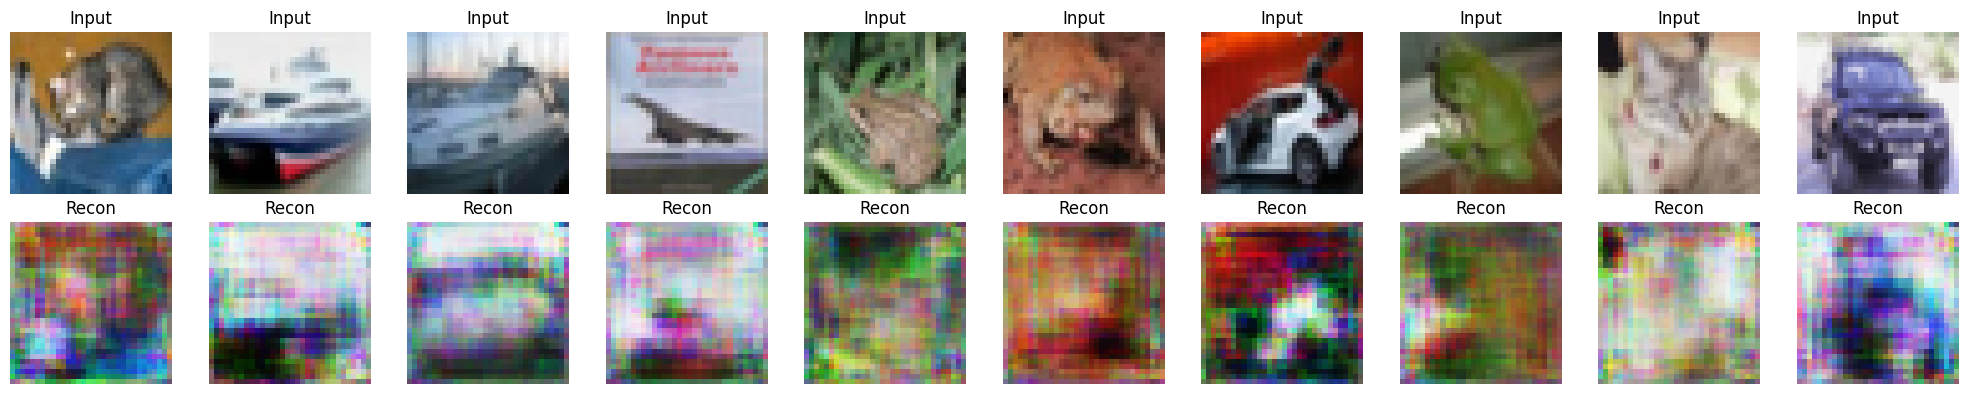

Saved to reconstruction_results.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import struct
import os

def visualize_results(bin_file='build/vis_data.bin'):
    if not os.path.exists(bin_file):
        print(f"Error: File {bin_file} not found!")
        return

    print(f"Reading data from {bin_file}...")

    with open(bin_file, 'rb') as f:
        N = struct.unpack('i', f.read(4))[0]
        print(f"Found {N} images")

        img_size = 3 * 32 * 32
        total_bytes = N * img_size * 4

        inputs_raw = f.read(total_bytes)
        inputs = np.frombuffer(inputs_raw, dtype=np.float32)
        inputs = inputs.reshape(N, 3, 32, 32)

        outputs_raw = f.read(total_bytes)
        outputs = np.frombuffer(outputs_raw, dtype=np.float32)
        outputs = outputs.reshape(N, 3, 32, 32)

    num_show = min(N, 10)
    plt.figure(figsize=(20, 4))

    for i in range(num_show):
        ax = plt.subplot(2, num_show, i + 1)
        img_in = np.transpose(inputs[i], (1, 2, 0))  # CHW -> HWC
        img_in = np.clip(img_in, 0.0, 1.0)
        plt.imshow(img_in)
        plt.title("Input")
        plt.axis("off")

        ax = plt.subplot(2, num_show, i + 1 + num_show)
        img_out = np.transpose(outputs[i], (1, 2, 0))  # CHW -> HWC
        img_out = np.clip(img_out, 0.0, 1.0)
        plt.imshow(img_out)
        plt.title("Recon")
        plt.axis("off")

    plt.tight_layout()
    plt.savefig('reconstruction_results.png', dpi=150)
    plt.show()
    print("Saved to reconstruction_results.png")

if __name__ == "__main__":
    visualize_results('vis_data.bin')

## Extract features and SVM

In [ ]:
!./extract_features weights/gpu_epoch_10.bin

=== Feature Extraction ===
Weights: weights/gpu_epoch_10.bin
Feature dim: 8192
Model loaded from weights/gpu_epoch_10.bin
Model loaded successfully!

--- Extracting Training Features ---
>> DataLoader initialized. Samples: 50000 | Batch Size: 64
Processed 750 batches...
Saved 50000 samples to train_features.bin

--- Extracting Test Features ---
>> DataLoader initialized. Samples: 10000 | Batch Size: 64
Processed 150 batches...
Saved 10000 samples to test_features.bin
Done


**Notice:** You must be setup the amount of samples for expected accuracy (TRAIN_SUBSET)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import struct
import time
import joblib

def load_features(filepath):
    """Load features from binary file"""
    with open(filepath, 'rb') as f:
        num_samples = struct.unpack('i', f.read(4))[0]
        feature_dim = struct.unpack('i', f.read(4))[0]

        print(f"Loading {num_samples} samples with {feature_dim} features...")

        features_raw = f.read(num_samples * feature_dim * 4)
        features = np.frombuffer(features_raw, dtype=np.float32)
        features = features.reshape(num_samples, feature_dim)

        labels_raw = f.read(num_samples * 4)
        labels = np.frombuffer(labels_raw, dtype=np.int32)

    return features, labels

TRAIN_SUBSET = 1000 # you can set up train more samples for more acc

print("=" * 50)
print("Loading extracted features...")
print("=" * 50)

X_train_full, y_train_full = load_features('train_features.bin')
X_test, y_test = load_features('test_features.bin')

X_train = X_train_full[:TRAIN_SUBSET]
y_train = y_train_full[:TRAIN_SUBSET]

print(f"\nUsing {TRAIN_SUBSET} training samples (subset)")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

print("\nNormalizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "=" * 50)
print(f"Training SVM on {TRAIN_SUBSET} samples...")
print("=" * 50)

svm = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    verbose=True,
    cache_size=2000
)

start_time = time.time()
svm.fit(X_train_scaled, y_train)
train_time = time.time() - start_time
print(f"\nTraining time: {train_time:.2f} seconds ({train_time/60:.2f} minutes)")

print("\n" + "=" * 50)
print("Evaluating...")
print("=" * 50)

# Training accuracy
# y_train_pred = svm.predict(X_train_scaled)
# train_acc = accuracy_score(y_train, y_train_pred)
# print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Test accuracy
y_test_pred = svm.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

print("\n" + "=" * 50)
print("Classification Report (Test Set):")
print("=" * 50)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_test, y_test_pred, target_names=class_names))


joblib.dump(svm, 'svm_model_5k.pkl')
joblib.dump(scaler, 'scaler_5k.pkl')
print("\nSaved model to svm_model_5k.pkl")

Loading extracted features...
Loading 50000 samples with 8192 features...
Loading 10000 samples with 8192 features...

Using 1000 training samples (subset)
Train: (1000, 8192), Test: (10000, 8192)

Normalizing features...

Training SVM on 1000 samples...
[LibSVM]
Training time: 5.88 seconds (0.10 minutes)

Evaluating...
Test Accuracy: 39.36%

Classification Report (Test Set):
              precision    recall  f1-score   support

    airplane       0.47      0.47      0.47      1000
  automobile       0.29      0.66      0.40      1000
        bird       0.32      0.28      0.30      1000
         cat       0.27      0.17      0.21      1000
        deer       0.40      0.32      0.36      1000
         dog       0.37      0.28      0.32      1000
        frog       0.46      0.48      0.47      1000
       horse       0.45      0.39      0.42      1000
        ship       0.55      0.48      0.51      1000
       truck       0.47      0.40      0.44      1000

    accuracy             